
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.
# **New Section**


<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

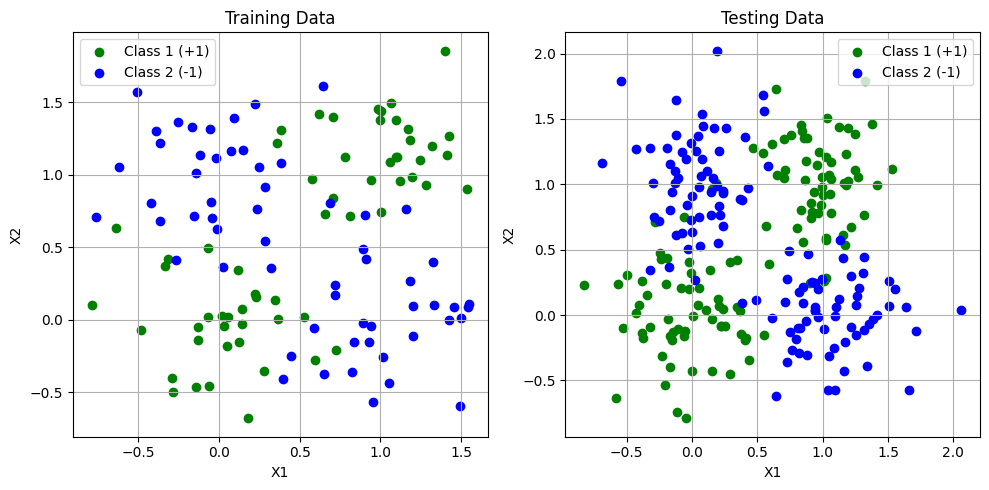

In [ ]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1= np.array([0, 0])
mean2= np.array([0, 1])
mean3= np.array([1, 0])
mean4= np.array([1, 1])
cov= np.array([[0.1, 0], [0, 0.1]])

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution



#Generate training data

train_data_sample_1 = np.random.multivariate_normal(mean1, cov, 30)
train_data_sample_2 = np.random.multivariate_normal(mean2, cov, 30)
train_data_sample_3 = np.random.multivariate_normal(mean3, cov, 30)
train_data_sample_4 = np.random.multivariate_normal(mean4, cov, 30)


#Generate testing data

test_data_sample_1 = np.random.multivariate_normal(mean1, cov, 60)
test_data_sample_2 = np.random.multivariate_normal(mean2, cov, 60)
test_data_sample_3 = np.random.multivariate_normal(mean3, cov, 60)
test_data_sample_4 = np.random.multivariate_normal(mean4, cov, 60)

label_train_data_sample_1 = np.ones(30)
label_train_data_sample_2 = np.ones(30) * -1
label_train_data_sample_3 = np.ones(30) * -1
label_train_data_sample_4 = np.ones(30)

label_test_data_sample_1 = np.ones(60)
label_test_data_sample_2 = np.ones(60) * -1
label_test_data_sample_3 = np.ones(60) * -1
label_test_data_sample_4 = np.ones(60)

X_train = np.vstack([train_data_sample_1, train_data_sample_2, train_data_sample_3, train_data_sample_4])
Y_train = np.hstack([label_train_data_sample_1, label_train_data_sample_2, label_train_data_sample_3, label_train_data_sample_4])

X_test = np.vstack([test_data_sample_1, test_data_sample_2, test_data_sample_3, test_data_sample_4])
Y_test = np.hstack([label_test_data_sample_1, label_test_data_sample_2, label_test_data_sample_3, label_test_data_sample_4])

#Visualize the data using plt.scatter() function
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], color='green', label='Class 1 (+1)')
plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], color='blue', label='Class 2 (-1)')
plt.title('Training Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1 (+1)')
plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2 (-1)')
plt.title('Testing Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Accuracy: 89.17%


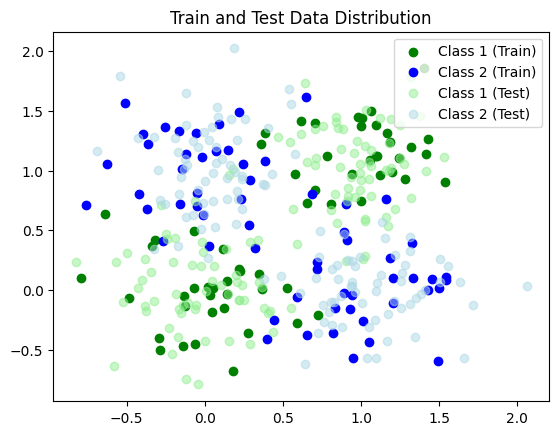

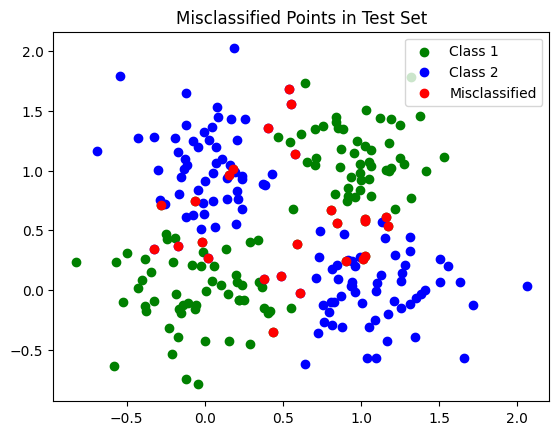

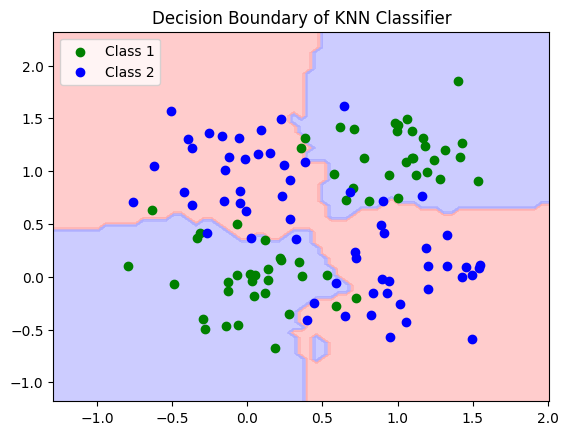

In [ ]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5,distance_metric="l2"):
        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        #Default distance_metric is L2 norm

        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self,X_train,Y_train):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train = X_train
        self.y_train = Y_train

    def predict(self,X_test):
        #This method predicts the class labels for a set of data samples. X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)
        predicted_data = []

        for x in X_test:
          if self.distance_metric == "l2":
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
          elif self.distance_metric == "l1":
            distances = np.sum(np.abs(self.X_train - x), axis=1)
          # else:
          #   raise ValueError("Invalid distance metric. Use 'l2' or 'l1'.")

          k_index = np.argsort(distances)[:self.n_neighbors]
          k_labels = self.y_train[k_index]
          predicted_label = np.sign(np.sum(k_labels))
          if np.sum(k_labels) == 0:
            predicted_label = np.random.choice([1,-1])
          predicted_data.append(predicted_label)

        return np.array(predicted_data)


#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
    #Inputs : Ground truth and predicted labels
    #Outputs : Portion of data points that are correctly classified, i.e., accuracy
    return np.mean(true == pred)

# Predict on test data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

# Compute accuracy
accuracy = KNNAccuracy(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


#Create a visual representation of predictions


plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], color='green', label='Class 1 (Train)')
plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], color='blue', label='Class 2 (Train)')
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='lightgreen', label='Class 1 (Test)', alpha=0.5)
plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='lightblue', label='Class 2 (Test)', alpha=0.5)
plt.legend()
plt.title("Train and Test Data Distribution")
plt.show()

incorrect = (Y_pred != Y_test)
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1')
plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2')
plt.scatter(X_test[incorrect][:, 0], X_test[incorrect][:, 1], color='red', label='Misclassified')
plt.legend()
plt.title("Misclassified Points in Test Set")
plt.show()

#Generate and visualize the decision regions and overlay the test points

def plot_decision_boundary(knn, X_train, Y_train):
    h = 0.05
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = knn.predict(grid_points)
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], color='green', label='Class 1')
    plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], color='blue', label='Class 2')
    plt.legend()
    plt.title("Decision Boundary of KNN Classifier")
    plt.show()

plot_decision_boundary(knn, X_train, Y_train)



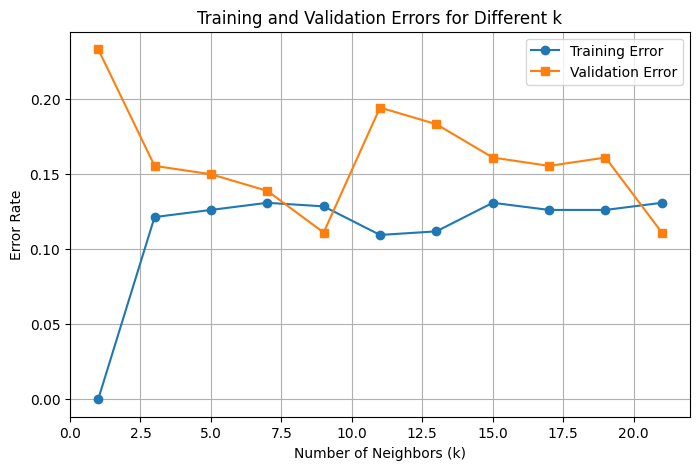

Best value for k: 9
Test Accuracy with best k (9): 90.00%


In [ ]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,rho, X_train, Y_train, num_splits=5):
  #Iterate through range of k values
    #Hold out rho fraction of training data in each repetition.

    train_errors = []
    validation_errors = []

    for k in k_range:
      train_error = 0
      validation_error = 0

      for _ in range(num_splits):
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        split = int((1 - rho) * len(X_train))
        X_train_split, X_val_split = X_train[indices[:split]], X_train[indices[split:]]
        Y_train_split, Y_val_split = Y_train[indices[:split]], Y_train[indices[split:]]
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_split, Y_train_split)

        Y_train_pred = knn.predict(X_train_split)
        Y_val_pred = knn.predict(X_val_split)

        train_error += (1 - KNNAccuracy(Y_train_split, Y_train_pred)) / num_splits
        validation_error += (1 - KNNAccuracy(Y_val_split, Y_val_pred)) / num_splits

      train_errors.append(train_error )
      validation_errors.append(validation_error )

    return train_errors, validation_errors
  #Return errors on training and validation data

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
rho_value = 0.3

train_errors, validation_errors = holdoutCVkNN(k_values, rho_value, X_train, Y_train)

#Plot training and validation errors for different values of k
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_errors, marker='o', label='Training Error')
plt.plot(k_values, validation_errors, marker='s', label='Validation Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Training and Validation Errors for Different k')
plt.legend()
plt.grid(True)
plt.show()


#what is the best value for k?

best_k = k_values[np.argmin(validation_errors)]
print(f"Best value for k: {best_k}")

#Effect of rho on k




#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, Y_train)
Y_test_pred = knn_best.predict(X_test)

test_accuracy = KNNAccuracy(Y_test, Y_test_pred)
print(f"Test Accuracy with best k ({best_k}): {test_accuracy * 100:.2f}%")





Evaluating for training size: 200
Best k: 11, Test Accuracy: 89.1667
Evaluating for training size: 400
Best k: 21, Test Accuracy: 90.8333
Evaluating for training size: 800
Best k: 11, Test Accuracy: 89.1667
Evaluating for training size: 1200
Best k: 9, Test Accuracy: 90.0000
Evaluating for training size: 1600
Best k: 17, Test Accuracy: 89.5833
Evaluating for training size: 2000
Best k: 21, Test Accuracy: 90.8333


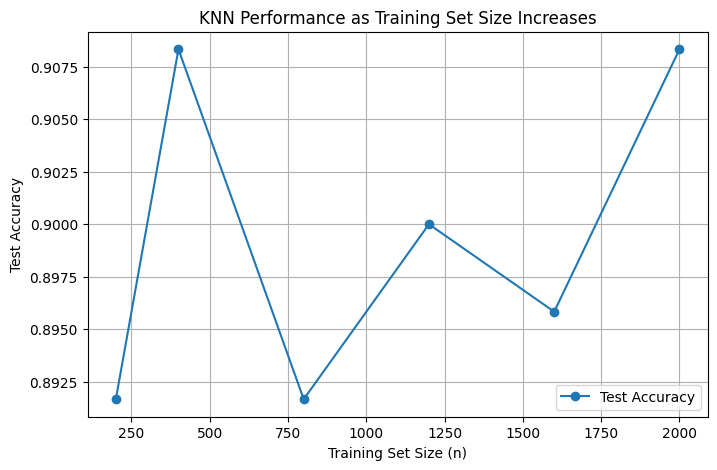

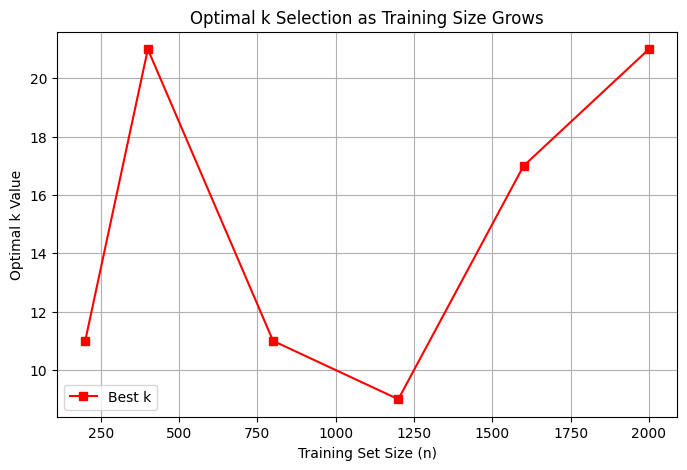


--- KNN Performance Analysis ---
Gaussian Data (l2) - Best k: 7, Accuracy: 88.7500
Laplacian Data (l2) - Best k: 5, Accuracy: 47.5000
Gaussian Data (l1) - Best k: 19, Accuracy: 90.0000
Laplacian Data (l1) - Best k: 19, Accuracy: 50.0000


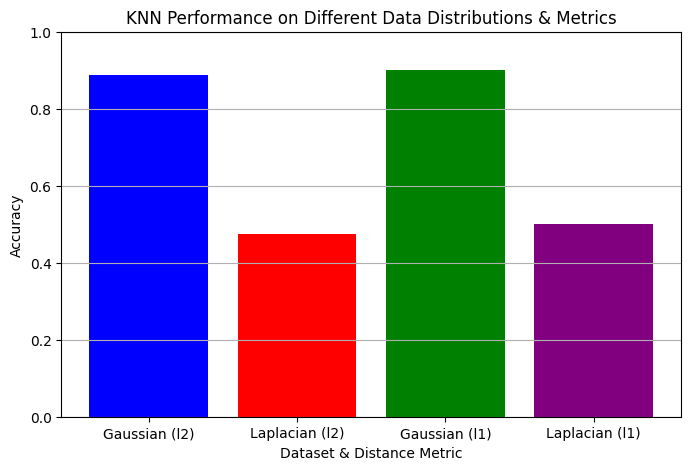

In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases


# Function to evaluate KNN performance as n increases
def evaluate_knn_with_data_size(n_values, k_values, rho=0.3, num_splits=5):
    test_accuracies = []
    best_k_values = []

    for n in n_values:
        print(f"Evaluating for training size: {n}")

        # Select the first n samples from the existing training dataset
        X_train_n, Y_train_n = X_train[:n], Y_train[:n]

        # Choose the best k using holdout validation
        train_errors, validation_errors = holdoutCVkNN(k_values, rho, X_train_n, Y_train_n, num_splits)
        best_k = k_values[np.argmin(validation_errors)]
        best_k_values.append(best_k)

        # Train KNN with best k and evaluate on test data
        knn_best = KNeighborsClassifier(n_neighbors=best_k)
        knn_best.fit(X_train_n, Y_train_n)
        Y_test_pred = knn_best.predict(X_test)

        # Compute accuracy
        test_accuracy = KNNAccuracy(Y_test, Y_test_pred)
        test_accuracies.append(test_accuracy)

        print(f"Best k: {best_k}, Test Accuracy: {test_accuracy*100:.4f}")

    return n_values, test_accuracies, best_k_values

# Define different training sizes
n_values = [200, 400, 800, 1200, 1600, 2000]
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

# Run evaluation
n_values, test_accuracies, best_k_values = evaluate_knn_with_data_size(n_values, k_values)

# Plot Test Accuracy vs Training Size
plt.figure(figsize=(8, 5))
plt.plot(n_values, test_accuracies, marker='o', label="Test Accuracy")
plt.xlabel("Training Set Size (n)")
plt.ylabel("Test Accuracy")
plt.title("KNN Performance as Training Set Size Increases")
plt.grid(True)
plt.legend()
plt.show()

# Plot Best k vs Training Size
plt.figure(figsize=(8, 5))
plt.plot(n_values, best_k_values, marker='s', color='red', label="Best k")
plt.xlabel("Training Set Size (n)")
plt.ylabel("Optimal k Value")
plt.title("Optimal k Selection as Training Size Grows")
plt.grid(True)
plt.legend()
plt.show()


#Performance evaluation with different data distributions, i.e., Gaussian, Laplacian

means = [np.mean(X_train, axis=0), np.mean(X_test, axis=0)]
scale = [np.std(X_train, axis=0), np.std(X_test, axis=0)]

def generate_laplacian_data(n_samples, mean, scale,  n_features=2, n_classes=2):
    X = []
    y = []

    means = np.array(mean)
    scale = np.array(scale)

    n_samples_per_class = [n_samples // n_classes] * n_classes
    n_samples_per_class[0] += n_samples % n_classes

    for i in range(n_classes):
        mean_vector = np.array(means[i])  # Ensure mean is a 1D array
        scale_vector = np.array(scale[i])  # Ensure scale is a 1D array

        X_class = np.random.laplace(loc=mean_vector, scale=scale_vector, size=(n_samples_per_class[i], n_features))
        y_class = np.full(n_samples_per_class[i], i, dtype=int)

        X.append(X_class)
        y.append(y_class)

    X = np.vstack(X)
    y = np.hstack(y)
    return X, y

def evaluate_knn(X_train, Y_train, X_test, Y_test, k_values, metric):
    train_errors, validation_errors = holdoutCVkNN(k_values, 0.3, X_train, Y_train)
    best_k = k_values[np.argmin(validation_errors)]

    knn_best = KNeighborsClassifier(n_neighbors=best_k, distance_metric=metric)
    knn_best.fit(X_train, Y_train)
    Y_test_pred = knn_best.predict(X_test)
    test_accuracy = KNNAccuracy(Y_test, Y_test_pred)
    return  best_k, test_accuracy

n_train, n_test = len(X_train), len(X_test)


X_train_laplace, Y_train_laplace = generate_laplacian_data(n_train, mean, scale)
X_test_laplace, Y_test_laplace = generate_laplacian_data(n_test, mean, scale)

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

best_k_gaussian, acc_gaussian = evaluate_knn(X_train, Y_train, X_test, Y_test, k_values, "l2")
best_k_laplace, acc_laplace = evaluate_knn(X_train_laplace, Y_train_laplace, X_test_laplace, Y_test_laplace, k_values, "l2")

best_k_gaussian_l1, acc_gaussian_l1 = evaluate_knn(X_train, Y_train, X_test, Y_test, k_values, "l1")
best_k_laplace_l1, acc_laplace_l1 = evaluate_knn(X_train_laplace, Y_train_laplace, X_test_laplace, Y_test_laplace, k_values, "l1")

print("\n--- KNN Performance Analysis ---")
print(f"Gaussian Data (l2) - Best k: {best_k_gaussian}, Accuracy: {acc_gaussian*100:.4f}")
print(f"Laplacian Data (l2) - Best k: {best_k_laplace}, Accuracy: {acc_laplace*100:.4f}")
print(f"Gaussian Data (l1) - Best k: {best_k_gaussian_l1}, Accuracy: {acc_gaussian_l1*100:.4f}")
print(f"Laplacian Data (l1) - Best k: {best_k_laplace_l1}, Accuracy: {acc_laplace_l1*100:.4f}")

labels = ['Gaussian (l2)', 'Laplacian (l2)', 'Gaussian (l1)', 'Laplacian (l1)']
accuracies = [acc_gaussian, acc_laplace, acc_gaussian_l1, acc_laplace_l1]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'red', 'green', 'purple'])
plt.xlabel('Dataset & Distance Metric')
plt.ylabel('Accuracy')
plt.title('KNN Performance on Different Data Distributions & Metrics')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


Distance Metric: l1 - Best k: 7, Accuracy: 0.8792
Distance Metric: l2 - Best k: 9, Accuracy: 0.9000


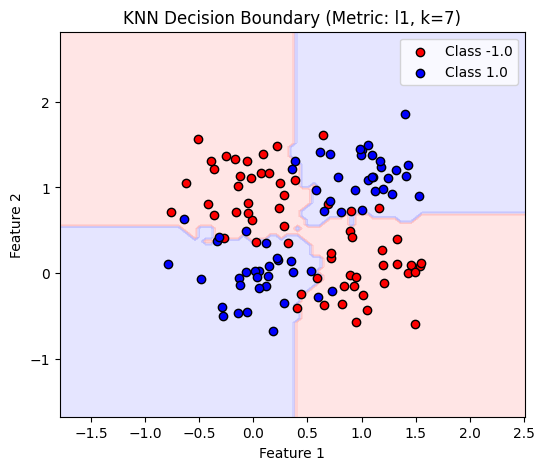

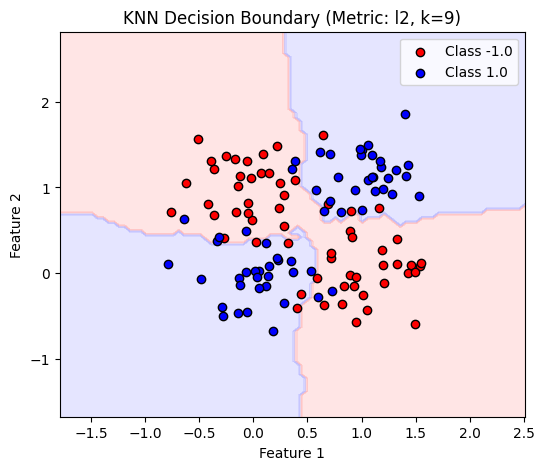

In [ ]:
##################################
#Part(e): Influence of distance metric on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance metric

def plot_decision_boundary(X, y, k, distance_metric, title):
    h = 0.05  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    knn = KNeighborsClassifier(n_neighbors=k, distance_metric=distance_metric)
    knn.fit(X, y)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#0000FF']

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    for idx, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label, 0], X[y == label, 1],
                    label=f'Class {label}', color=cmap_bold[idx], edgecolor='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

def evaluate_knn_metrics(X_train, Y_train, X_test, Y_test, k_values, distance_metrics):
    results = {}
    for distance_metric in distance_metrics:
        train_errors, validation_errors = holdoutCVkNN(k_values, 0.3, X_train, Y_train)
        best_k = k_values[np.argmin(validation_errors)]

        knn_best = KNeighborsClassifier(n_neighbors=best_k, distance_metric=distance_metric)
        knn_best.fit(X_train, Y_train)

        Y_test_pred = knn_best.predict(X_test)
        test_accuracy = KNNAccuracy(Y_test, Y_test_pred)
        results[distance_metric] = (best_k, test_accuracy)
    return results

# Define parameters
k_values = [1, 3, 5, 7, 9, 11]
distance_metrics = ['l1', 'l2']

# Evaluate KNN for different distance metrics
results = evaluate_knn_metrics(X_train, Y_train, X_test, Y_test, k_values, distance_metrics)

# Print results
for distance_metric, (best_k, acc) in results.items():
    print(f"Distance Metric: {distance_metric} - Best k: {best_k}, Accuracy: {acc:.4f}")

# Plot decision boundaries for best k with different metrics
for distance_metric, (best_k, _) in results.items():
    plot_decision_boundary(np.array(X_train), np.array(Y_train), best_k, distance_metric, f'KNN Decision Boundary (Metric: {distance_metric}, k={best_k})')





#Understand the decision regions of KNN classifier with different distance metric







KeyboardInterrupt: 

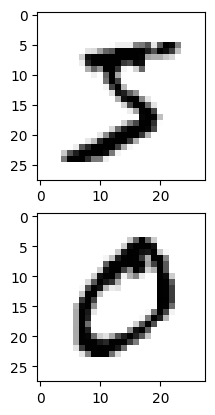

In [ ]:
##################################
#Part(f): MNIST Digit classification using KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
import numpy as np  # Required for array operations
import seaborn as sns  # Missing import for confusion matrix heatmap
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images

plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits
def train_test_split(data, labels, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    split_idx = int(data.shape[0] * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return data[train_idx], data[test_idx], labels[train_idx], labels[test_idx]

X_train, X_temp, y_train, y_temp = train_test_split(images, targets, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Write 'MultiClassKNNClassify' function
class KNeighborsClassifier:
    def __init__(self, n_neighbors=5, distance_metric="l2"):
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.y_train = Y_train

    def predict(self, X_test):
        predicted_data = []
        for x in X_test:
            if self.distance_metric == "l2":
                distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            elif self.distance_metric == "l1":
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            k_index = np.argsort(distances)[:self.n_neighbors]
            k_labels = self.y_train[k_index].astype(int)  # Convert labels to integers
            predicted_label = np.bincount(k_labels).argmax()
            predicted_data.append(predicted_label)
        return np.array(predicted_data)


# Multi-class KNN classification
def MultiClassKNNClassify(X_train, y_train, X_val, y_val, k_values, distance_metrics):
    best_k, best_metric, best_acc = None, None, 0
    for distance_metric in distance_metrics:
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, distance_metric=distance_metric)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_val)
            acc = accuracy_score(y_val, y_pred)
            if acc > best_acc:
                best_k, best_metric, best_acc = k, distance_metric, acc
    return best_k, best_metric

#Empirically chose most suitable k and distance metric based on the evauation on cross-validation data

k_values = [1, 3, 5, 7]
distance_metrics = ["l1", "l2"]
best_k, best_metric = MultiClassKNNClassify(X_train, y_train, X_val, y_val, k_values, distance_metrics)
print(f"Best k: {best_k}, Best Metric: {best_metric}")

#Evaluate the performance on test data with the best hyper parameters ( k, distance metric ) obtained from cross validation

knn_best = KNeighborsClassifier(n_neighbors=best_k, distance_metric=best_metric)
knn_best.fit(X_train, y_train)
y_test_pred = knn_best.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc*100:.4f}")

#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    #Inputs: Ground truth labels and classifier predictions
    #Outputs: Confusion matrix
    #Confusion matrix: A confusion matrix is a table that summarizes the performance of a classification model by comparing its predictions to the actual ground truth values
    #Rows: Represent the actual class labels
    #Columns: Represent the predicted class labels
    cm = confusion_matrix(true, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


#Suggest an alternative ways to improve performance

print("\nPossible improvements:")
print("1. Use feature scaling (e.g., normalize pixel values).")
print("2. Try different distance metrics such as cosine similarity.")
print("3. Use dimensionality reduction techniques (PCA) to reduce noise.")
print("4. Experiment with different values of k.")
print("5. Implement a weighted KNN where closer neighbors have more influence.")




<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data
